# Cat Dog

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

## Lets learn about pre-processing

## Display Image

In [3]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

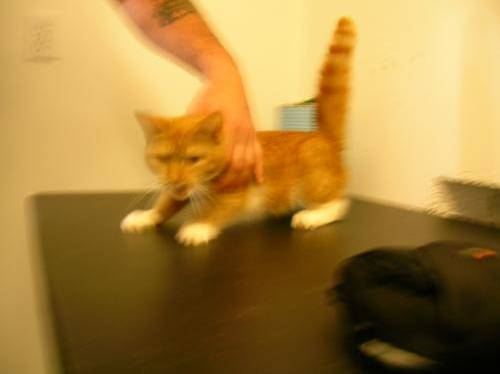

In [4]:
with Image.open('../data/cat_dog/cat_dog/train/cat/0.jpg') as im:
    display(im) #Display is for any images

In [11]:
# So if we want to display all images we need to know the file name --> use os

path = '../data/cat_dog/cat_dog/'

imagenames = []
for folder, subfolders, filenames in os.walk(path):
    #print(folder, "/", subfolders, "/", filenames)
    for img in filenames:
        imagenames.append(folder + "/" + img)

imagenames[:5]



['../data/cat_dog/cat_dog/test/cat/10000.jpg',
 '../data/cat_dog/cat_dog/test/cat/10001.jpg',
 '../data/cat_dog/cat_dog/test/cat/10002.jpg',
 '../data/cat_dog/cat_dog/test/cat/10003.jpg',
 '../data/cat_dog/cat_dog/test/cat/10004.jpg']

## Lets create a dataframe

In [13]:
image_sizes = []
rejected_image = []

for image in imagenames:
    try:
        with Image.open(image) as im:
            image_sizes.append(im.size)
    except:
        rejected_image.append(image)

print(image_sizes[:5])
print(len(rejected_image))
print(rejected_image[:5])


[(431, 359), (500, 374), (499, 471), (499, 375), (320, 239)]
0
[]


In [14]:
image_sizes[0]

(431, 359)

In [15]:
df = pd.DataFrame(image_sizes, columns=['width', 'height'])
df.head()

,width,height
0,431,359
1,500,374
2,499,471
3,499,375
4,320,239


## Transformations

In [21]:
dog = Image.open('../data/cat_dog/cat_dog/train/dog/0.jpg')
print(dog.size) #W, H


(499, 375)


In [17]:
#getpixel

r,g,b = dog.getpixel((0,0))
print(r,g,b)

115 113 124


In [18]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [19]:
im = transform(dog)
type(im)

torch.Tensor

In [20]:
print(im.shape) #C, H, W

torch.Size([3, 375, 499])


In [23]:
im = im.permute((1,2,0)) # For plt.imshow(H,W,C)
im.shape

torch.Size([375, 499, 3])

In [24]:
# Previously the pixel r,g,b 115, 113, 124
im[0,0,:]


tensor([0.4510, 0.4431, 0.4863])

In [26]:
115/255, 133/255

(0.45098039215686275, 0.5215686274509804)

### Resize

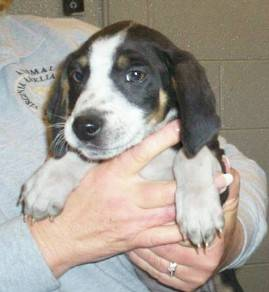

In [27]:
small_dog = Image.open('../data/cat_dog/cat_dog/train/dog/10.jpg')
display(small_dog)

torch.Size([651, 600, 3])

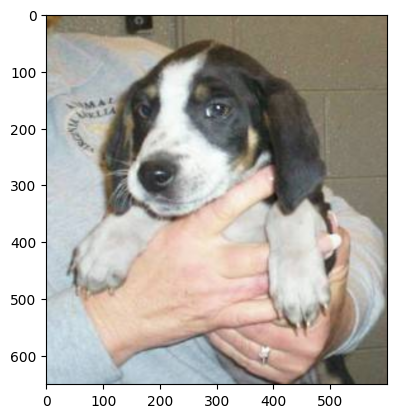

In [29]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(600)
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)

im.shape 

torch.Size([224, 224, 3])

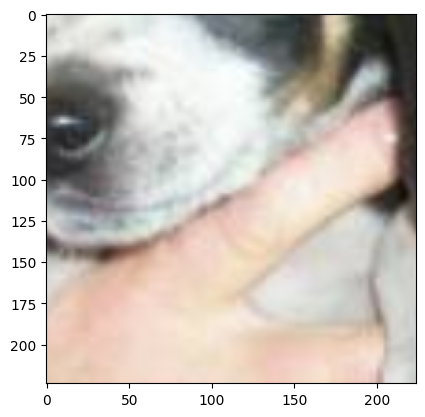

In [30]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(600),
    transforms.CenterCrop(224)
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)

im.shape 

torch.Size([600, 600, 3])

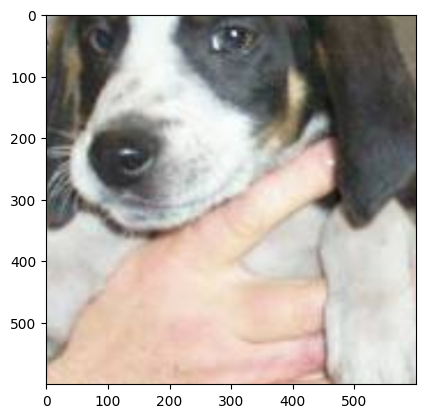

In [31]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(1000),
    transforms.CenterCrop(600)
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)

im.shape 

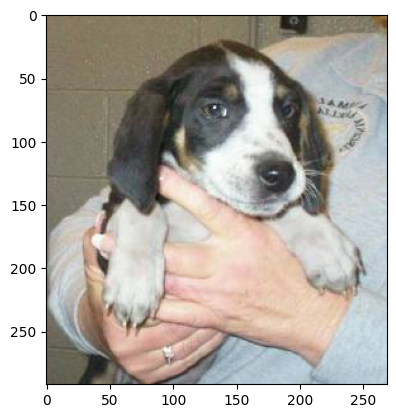

In [34]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)

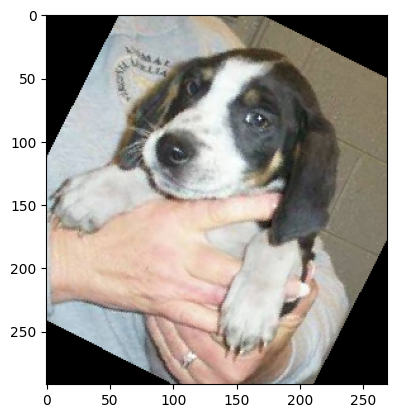

In [36]:
transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)

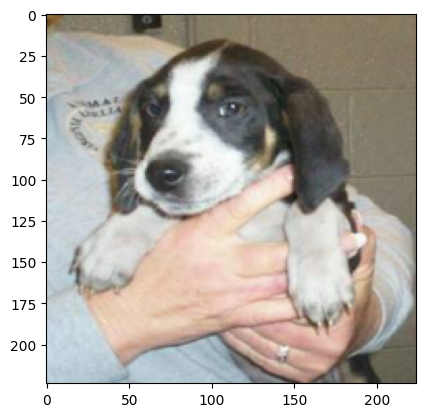

In [37]:
#Not receommended
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

im = transform(small_dog)
im = im.permute((1,2,0))
plt.imshow(im)

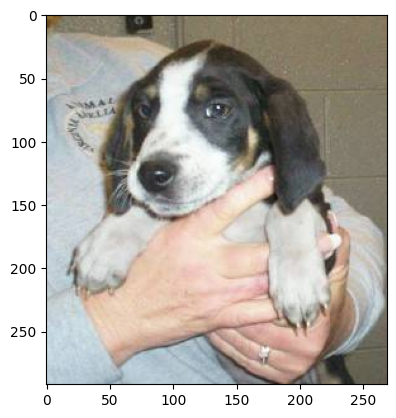

In [40]:
transform = transforms.Compose([
    transforms.ToTensor()
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

In [41]:
im[0, 0, :]

tensor([0.5686, 0.4784, 0.2667])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


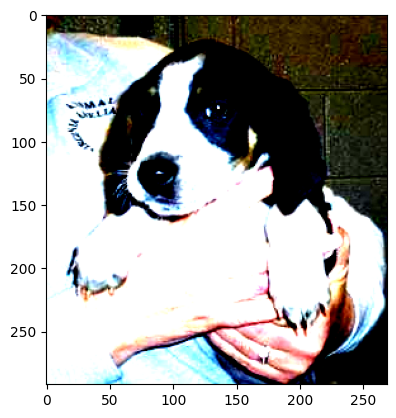

In [42]:
#why we need this randomicity?
#idea: so we can create synthetic data or basically more data
#idea: data augmentation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

im = transform(small_dog)
im = im.permute((1, 2, 0))
plt.imshow(im)

In [43]:
im[0, 0, :]

tensor([ 0.3652,  0.1001, -0.6193])

In [44]:
#format: number - mean / std
#mean of r, g, b [0.485, 0.456, 0.406]
#std  of r, g, b [0.229, 0.224, 0.225]

(0.5686 - 0.485) / 0.229, (0.4784 - 0.456) / 0.224, (0.2667-0.406) / 0.225

#question, how do you know what normalization to use??
#we data scientist don't know, the image experts will tell us!!
#if not, just use ToTensor()
#ToTensor simply divide by 255
#if you want to normalize properly
#1. listen the domain expert
#2. after ToTensor(), you can get the mean r g b, and also std r g b, and use that to normalize everyone!

(0.3650655021834061, 0.0999999999999999, -0.6191111111111113)

## Deep Learning

In [ ]:
# Define the transformers
# Offline and online augmentation

## 1. ELT

In [48]:
#idea is for training, we gonna have online augmentations
train_transform = transforms.Compose([
    transforms.RandomRotation(10),  #why 10?  I don't know!
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224), #so the shortest size will be 224
    transforms.CenterCrop(224),  #so the longest side will be 224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],   #this is provided by domain expert!
                         [0.229, 0.224, 0.225])
])

#for testing, NO augmentations!!!
test_transform = transforms.Compose([
    transforms.Resize(224), #so the shortest size will be 224
    transforms.CenterCrop(224),  #so the longest side will be 224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],   #this is provided by domain expert!
                         [0.229, 0.224, 0.225])
])
#why RandomRotation??, RandomHorizontalFlip??

In [52]:
#Set the imageFolder

root = '../data/cat_dog/cat_dog/'
train_path = os.path.join(root, 'train')
test_path = os.path.join(root, 'test')
print(train_path, test_path)

../data/cat_dog/cat_dog/train ../data/cat_dog/cat_dog/test


In [53]:
#set the ImageFolder
#ImageFolder:

train_data = datasets.ImageFolder(train_path, transform=train_transform)
test_data  = datasets.ImageFolder(test_path,  transform=test_transform)
#actually, best practices is that you need validation data, but today let's keep it simple

In [54]:
#Create DataLoader
torch.manual_seed(999)
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)



In [55]:
train_data.classes

['cat', 'dog']

In [56]:
len(train_data), len(test_data)

(18002, 6998)

## EDA

In [58]:
for images, labels in train_loader:
    break

images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [59]:
from torchvision.utils import make_grid
images = images[:10]
labels = labels[:10]
print(labels)

tensor([0, 1, 1, 1, 0, 1, 1, 1, 1, 1])


In [60]:
print(*[train_data.classes[label] for label in labels])

cat dog dog dog cat dog dog dog dog dog


0 1 1 1 0 1 1 1 1 1
cat dog dog dog cat dog dog dog dog dog


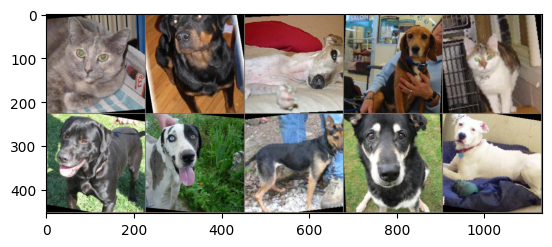

In [64]:
from torchvision.utils import make_grid

print(*(labels.numpy()))
print(*[train_data.classes[label] for label in labels])

#display 10 images
im = make_grid(images, nrow=5)

#denormlize the images....
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

im_inv = inv_normalize(im)
im_inv = im_inv.permute((1, 2, 0))

plt.imshow(im_inv)

## Define the model

In [66]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X



In [65]:
# O = (W - F  + 2P)/S + 1
#(224 - 3 +0)/1 + 1

222.0

In [ ]:
# Testing


In [67]:
torch.manual_seed(101)
CNNmodel  = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)

In [68]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [69]:
count_parameters(CNNmodel)

     162
       6
     864
      16
 5598720
     120
   10080
      84
     168
       2
________
 5610222


In [71]:
from torchvision import models
from torchvision.models import AlexNet_Weights

alexnet = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in alexnet.parameters():
    param.requires_grad=False